# Bike Sharing Dataset

# Business Problem Understanding

## Context
Bisnis Bike Sharing mengoperasikan layanan peminjaman sepeda untuk masyarakat. Penyedia layanan ini ingin meningkatkan efisiensi pengelolaan sepeda dengan memprediksi jumlah sepeda yang dibutuhkan setiap harinya. Hal ini akan membantu mereka dalam merencanakan stok sepeda, mengoptimalkan distribusi sepeda, dan meningkatkan kepuasan pelanggan dengan memastikan ketersediaan sepeda yang memadai.

## Problem Statement
Penyedia layanan Bike Sharing menghadapi tantangan dalam merencanakan stok sepeda harian. Kesalahan dalam memprediksi jumlah sepeda yang dibutuhkan dapat menyebabkan kekurangan atau kelebihan stok, yang pada gilirannya dapat mempengaruhi layanan pelanggan dan efisiensi operasional. Oleh karena itu, diperlukan solusi yang dapat menghasilkan prediksi jumlah sepeda yang akurat untuk setiap hari.

## Goals

1. Meningkatkan akurasi prediksi jumlah sepeda yang dibutuhkan.
2. Mengoptimalkan pengelolaan stok sepeda dengan mengurangi kekurangan atau kelebihan stok.
3. Meningkatkan efisiensi operasional dan kepuasan pelanggan dalam penggunaan layanan Bike Sharing.

## Analytic Approach

Menggunakan model prediktif berbasis regresi untuk mengembangkan sistem prediksi jumlah sepeda harian. Data historis sepeda yang dipinjam, faktor cuaca, hari libur, dan faktor lainnya akan digunakan sebagai fitur-fitur dalam model. Dengan memanfaatkan machine learning, model akan belajar dari pola-pola historis dan dapat memberikan prediksi yang lebih akurat untuk kebutuhan sepeda harian.

## Metric Evaluation

Root Mean Squared Error (RMSE):

Alasan: Penting untuk menilai seberapa besar kesalahan prediksi secara keseluruhan. Dalam konteks ini, RMSE dapat memberikan ukuran kesalahan yang signifikan yang dapat berdampak pada efisiensi pengelolaan stok.

Mean Absolute Error (MAE):

Alasan: Kita ingin memastikan bahwa setiap kesalahan prediksi memiliki dampak yang sebanding. MAE memberikan ukuran kesalahan absolut rata-rata tanpa efek kuadrat, yang konsisten dengan tujuan untuk menghindari kesalahan besar yang memiliki dampak yang berlebihan.

Mean Absolute Percentage Error (MAPE):

Alasan: Persentase kesalahan relatif terhadap jumlah sepeda yang sebenarnya dapat memberikan gambaran yang lebih langsung tentang akurasi prediksi dalam skala persentase. Berguna untuk memahami dampak kesalahan secara proporsional terhadap nilai sebenarnya.


# Data Understanding
* Dataset contains information about bikes that being rented from 2011 until 2012
* Each records are the representation about the conditions from these rentals system

**Attributes Information**
 
|Feature|Data Type|Description| 
| --- | --- | --- | 
| dteday | object | Date | 
| hum | float64 | Normalized humidity. The values are divided to 100 (max) | 
| weathersit | int64 | (1: Clear, Few clouds, Partly cloudy, Partly cloudy), (2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist), (3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), (4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) | 
| holiday | int64 | Whether the day is holiday or not | 
| season | int64 | (1:winter, 2:spring, 3:summer, 4:fall) | 
| atemp | float64 | Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hourly scale) | 
| temp | float64 | Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hourly scale) 
| hr | int64 | Hour of the day (00:00 AM - 23:00 PM)| 
| casual | int64 | Count of casual users | 
| registered | int64 | Count of registered users | 
| cnt | int64 | Count of total rental bikes including both casual and registered |

In [2]:
# Import Dataset
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


# Exploratory Data Analysis

In [4]:
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


In [5]:
# Checking is there any missing values
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Checking is there any data duplicates
df.duplicated().sum()

0

There are no missing values or any duplicated record found from Dataset

In [7]:
# Display columns names, amount of the unique data and samples from each columns
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,dteday,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-31, 2012-07-31, 2012-10-01, 2012-08-28, 2012-01-01, 2011-10-13, 2012-06-09, 2011-06-28, 2011-12-21, 2012-01-31, 2012-02-07, 2012-05-15, 2011-01-04, 2012-02-27, 2012-08-21, 2011-02-13, 2012-07-09, 2012-12-18, 2011-06-07, 2012-09-26, 2012-08-20, 2011-02-17, 2012-05-08, 2012-06-26, 2011-09-02, 2011-03-29, 2012-06-16, 2011-09-17, 2011-07-10, 2011-02-02, 2012-09-23, 2011-02-25, 2011-03-12, 2011-05-09, 2012-08-26, 2011-03-31, 2012-03-22, 2012-08-24, 2012-05-31, 2012-09-08, 2011-06-25, 2011-10-09, 2011-05-05, 2012-05-14, 2012-07-22, 2011-04-02, 2012-02-04, 2012-10-22, 2012-02-23, 2012-03-08, 2011-07-23, 2012-01-17, 2012-06-22, 2012-10-06, 2012-10-15, 2011-04-07, 2012-01-03, 2011-07-18, 2011-10-19, 2011-12-26, 2011-08-10, 2011-11-07, 2012-12-17, 2012-03-02, 2011-02-26, 2011-08-22, 2011-03-02, 2012-01-28, 2011-10-16, 2011-12-02, 2012-02-18, 2012-11-16, 2011-11-06, 2012-05-18, 2011-04-22, 2011-01-30, 2011-08-06, 2011-07-30, 2011-01-28, 2011-02-18, 2011-04-15, 2011-11-30, 2012-01-26, 2012-06-04, 2011-11-24, 2012-11-27, 2011-01-22, 2012-04-02, 2012-07-15, 2011-03-23, 2011-12-31, 2011-03-09, 2012-01-11, 2011-02-24, 2011-01-29, 2012-01-08, 2012-04-05, ...]"
1,hum,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.93, 1.0, 0.24, 0.78, 0.6, 0.38, 0.52, 0.8, 0.37, 0.3, 0.83, 0.94, 0.61, 0.73, 0.35, 0.41, 0.74, 0.49, 0.33, 0.44, 0.77, 0.89, 0.88, 0.66, 0.7, 0.71, 0.63, 0.57, 0.43, 0.39, 0.45, 0.48, 0.5, 0.34, 0.19, 0.36, 0.65, 0.81, 0.79, 0.27, 0.29, 0.67, 0.75, 0.76, 0.31, 0.4, 0.28, 0.69, 0.08, 0.32, 0.51, 0.46, 0.59, 0.58, 0.23, 0.84, 0.82, 0.47, 0.18, 0.25, 0.42, 0.86, 0.0, 0.68, 0.56, 0.16, 0.21, 0.97, 0.85, 0.26, 0.22, 0.2, 0.17, 0.1, 0.15, 0.13, 0.9, 0.92, 0.96, 0.91, 0.12, 0.14]"
2,weathersit,4,"[1, 2, 3, 4]"
3,holiday,2,"[0, 1]"
4,season,4,"[4, 2, 3, 1]"
5,atemp,65,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515, 0.2727, 0.6061, 0.4394, 0.2576, 0.5455, 0.2273, 0.6667, 0.4091, 0.3939, 0.6364, 0.5303, 0.5, 0.3636, 0.7424, 0.3333, 0.4242, 0.5758, 0.4697, 0.5909, 0.7576, 0.6818, 0.303, 0.7727, 0.1212, 0.803, 0.3182, 0.2121, 0.7879, 0.197, 0.1515, 0.4848, 0.1818, 0.3788, 0.0909, 0.2879, 0.2424, 0.5606, 0.1667, 0.7121, 0.7273, 0.0303, 0.8333, 0.8636, 0.8788, 0.1364, 0.1061, 0.8485, 0.8182, 0.0455, 0.8939, 0.9242, 0.0152, 0.0758, 0.0606, 0.9545, 0.9091, 0.0, 1.0, 0.9848]"
6,temp,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82, 0.66, 0.44, 0.58, 0.28, 0.22, 0.4, 0.38, 0.68, 0.56, 0.72, 0.52, 0.6, 0.34, 0.42, 0.64, 0.24, 0.48, 0.8, 0.32, 0.16, 0.74, 0.88, 0.3, 0.14, 0.9, 0.18, 0.06, 0.2, 0.5, 0.08, 0.78, 0.84, 0.04, 0.86, 0.12, 0.94, 0.1, 0.92, 0.96, 0.02, 0.98, 1.0]"
7,hr,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21, 20, 11, 3, 13, 19, 6, 12, 1, 2, 10, 17]"
8,casual,305,"[24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, 0, 110, 51, 7, 10, 45, 30, 87, 5, 15, 60, 49, 122, 254, 81, 80, 220, 46, 36, 14, 3, 48, 31, 310, 32, 72, 26, 21, 142, 245, 16, 8, 58, 126, 47, 62, 12, 93, 27, 74, 28, 55, 50, 132, 68, 75, 29, 18, 168, 57, 61, 283, 148, 43, 4, 138, 264, 71, 121, 41, 186, 44, 39, 237, 225, 226, 224, 118, 22, 170, 162, 35, 54, 84, 200, 116, 117, 38, 53, 65, 37, 25, 196, 78, 113, 66, 33, 253, ...]"
9,registered,742,"[226, 16, 90, 126, 758, 39, 196, 27, 5, 315, 20, 278, 273, 127, 74, 48, 192, 110, 223, 652, 432, 808, 188, 119, 32, 157, 118, 141, 49, 134, 21, 227, 437, 50, 101, 23, 212, 1, 142, 171, 474, 8, 83, 233, 155, 370, 41, 43, 4, 88, 156, 99, 169, 400, 237, 7, 72, 59, 109, 228, 17, 148, 6, 26, 73, 100, 247, 91, 293, 95, 222, 383, 168, 79, 176, 146, 216, 369, 220, 22, 338, 3, 11, 123, 180, 112, 42, 181, 618, 209, 374, 467, 128, 179, 67, 104, 33, 413, 14, 19, ...]"


In [8]:
# Getting the summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


# Menghapus Outlier

<AxesSubplot: xlabel='cnt'>

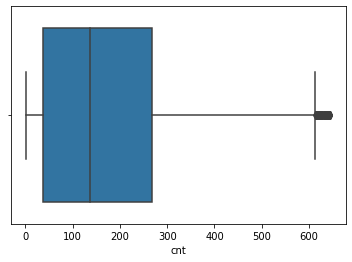

In [12]:
# Visualisasi distribusi 'count' (jumlah sepeda) untuk identifikasi outlier
sns.boxplot(x=df['cnt'])

<AxesSubplot: xlabel='cnt'>

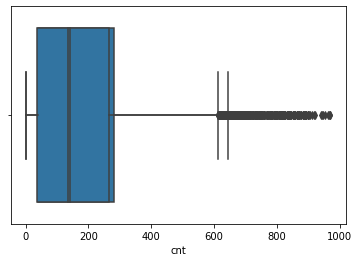

In [11]:


# Menghitung batas atas dan batas bawah untuk outlier
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
df = df[(df['cnt'] >= lower_bound) & (df['cnt'] <= upper_bound)]

# Menampilkan distribusi setelah menghapus outlier
sns.boxplot(x=df['cnt'])

Penghapusan outliers pada kolom "count" (jumlah sepeda) dilakukan karena, dalam konteks business problem yang dijelaskan sebelumnya, jumlah sepeda ini merupakan target variabel yang ingin diprediksi. Outliers dalam target variabel dapat memiliki dampak signifikan pada performa model dan hasil prediksi. Berikut adalah beberapa alasannya:

Pengaruh pada Prediksi: Outliers dapat memiliki pengaruh yang besar pada hasil prediksi model. Model yang sensitif terhadap data yang sangat ekstrem atau tidak biasa dapat menghasilkan estimasi yang kurang akurat.

Konsistensi Layanan: Dalam konteks layanan bike sharing, prediksi jumlah sepeda yang mencakup nilai ekstrem mungkin tidak konsisten dengan pola umum penggunaan sepeda. Penghapusan outliers dapat membantu menciptakan prediksi yang lebih stabil dan dapat diandalkan.

Pencegahan Kesalahan Operasional: Outliers dalam jumlah sepeda dapat menyebabkan kesalahan operasional yang signifikan. Misalnya, jika model memprediksi jumlah sepeda yang jauh lebih tinggi dari yang sebenarnya, ini dapat mengakibatkan kelebihan stok yang tidak perlu, sementara prediksi yang terlalu rendah dapat menyebabkan kekurangan stok dan kekecewaan pelanggan.

Normalitas Distribusi: Beberapa model prediksi, seperti regresi linear, mengasumsikan bahwa data memiliki distribusi normal. Outliers dapat melanggar asumsi ini dan menghasilkan prediksi yang tidak stabil.

As you can see that column `dteday` contain datetime type of data but still assigned as object. So we need to change it

In [8]:
# Changing dtype of dteday from object into datetime64
df['dteday'] = df['dteday'].astype('datetime64')

In [9]:
# dteday column is already being assigned as datetime64
df['dteday']

0       2011-12-09
1       2012-06-17
2       2011-06-15
3       2012-03-31
4       2012-07-31
           ...    
12160   2012-01-25
12161   2012-07-06
12162   2012-02-20
12163   2012-03-31
12164   2011-04-28
Name: dteday, Length: 12165, dtype: datetime64[ns]

We need to sort the data by column `dteday` so it got ascended correctly

In [10]:
# Sort the data based on the datetime
df = df.sort_values(['dteday', 'hr']).reset_index()
df.drop(columns='index', inplace=True)

In [11]:
# dteday column is already being assigned as datetime64
df['dteday']

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
12160   2012-12-31
12161   2012-12-31
12162   2012-12-31
12163   2012-12-31
12164   2012-12-31
Name: dteday, Length: 12165, dtype: datetime64[ns]

Then we are splitting the data of `dteday` so we can get features that we need for models 

In [47]:
# Splitting the data of `dteday` column into separate columns
year = []
month = []
day = []
for i in df["dteday"]:
    year.append(i.year)
    month.append(i.month)
    day.append(i.day)
df["year"] = year
df["month"] = month
df["day"] = day

In [48]:
# create new feature weekday
df['weekday'] = df['dteday'].apply(lambda x: x.weekday())

In [49]:
# create new feature working_day
df['working_day'] = df['weekday'].apply(lambda x: 0 if x > 5 or x == 0 else 1)
df['working_day'] = df[['holiday', 'working_day']].apply(
    lambda x: 0 if x['holiday'] == 1 else x['working_day'], axis=1)

The registered and casual features will be dropped because they are sub-features of the total_cust target label.

In [50]:
# Dropping registered and casual features
df.drop(columns=['registered', 'casual'], inplace=True)

KeyError: "['registered', 'casual'] not found in axis"

We will do visualize how much the amount of values from each columns

[Text(0, 0, 'Winter'),
 Text(1, 0, 'Spring'),
 Text(2, 0, 'Summer'),
 Text(3, 0, 'Fall')]

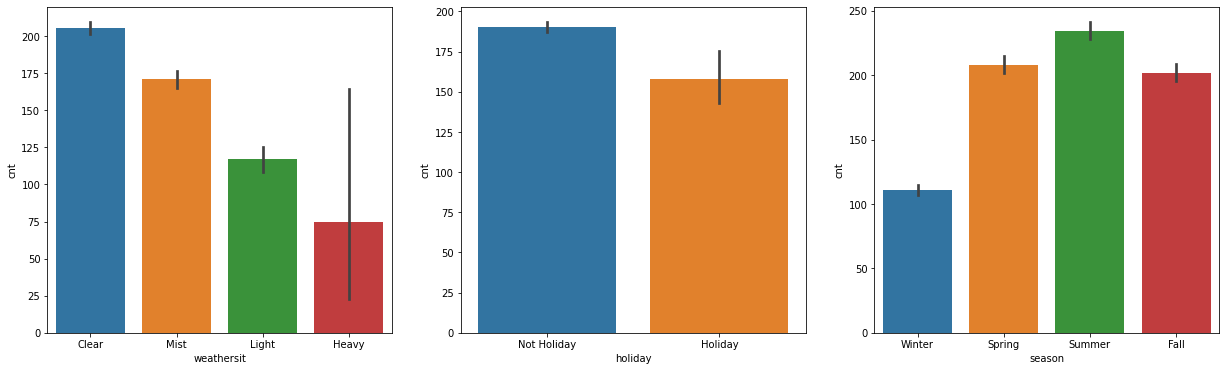

In [16]:
fig, axes = plt.subplots(1,3, figsize=(21, 6))
cnt_wth=sns.barplot(data=df, x="weathersit", y="cnt", ax=axes[0])
cnt_wth.set_xticklabels(['Clear','Mist','Light','Heavy'])
cnt_hday=sns.barplot(data=df, x="holiday", y="cnt", ax=axes[1])
cnt_hday.set_xticklabels(['Not Holiday','Holiday'])
cnt_sns=sns.barplot(data=df, x="season", y="cnt", ax=axes[2])
cnt_sns.set_xticklabels(['Winter','Spring','Summer','Fall'])


From these charts we see that bikes are being rented the most when the weather is clear, the season is summer and it is not holiday. With that so we assumed that these features do effect the amount of bikes that being rented.


We will also do visualize how is the trend within year

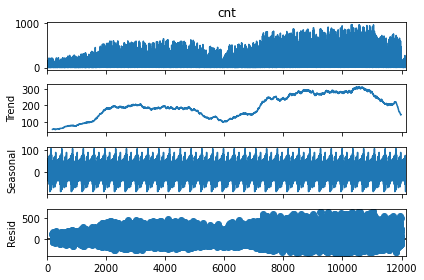

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
series=df['cnt']
result=seasonal_decompose(series,model='addictive',period=365)
result.plot()
plt.show()

From graph above, we could assumed that season being the most affecting feature because the trend goes up on spring (March, April and May), Summer (June, July and August) even Autumn (September, October and November) but goes down significantly on Winter (December, January and February).

In [18]:
import plotly.graph_objects as go
fig=go.Figure([go.Scatter(name='true',x=df['dteday'],y=df['cnt'])])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

The trend of the amount of bikes that being rented from 2011 and 2012 relatively the same. it goes up on April until October and then gradually decreasing until around January to February

Then we  check is there any multicollinearity from each columns

In [19]:
# Making a def function to check for multicollinearity from columns
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [20]:
# Checking for multicollinearity from each columns
calc_vif(df.drop(columns=['cnt','dteday']))

,variables,VIF
0,hum,16.214353
1,weathersit,7.460041
2,holiday,1.166845
3,season,20.892781
4,atemp,354.344300
5,temp,312.504533
6,hr,4.225367
7,year,37.934085
8,month,14.842581
9,day,4.174387


There are some features that have relatively high values of vif that represents multicollinearity. However, Multicollinearity may not be a problem in forecasting but it will be a problem in simulation so we used as many features.

Text(0.5, 1.0, 'Correlation Matrix')

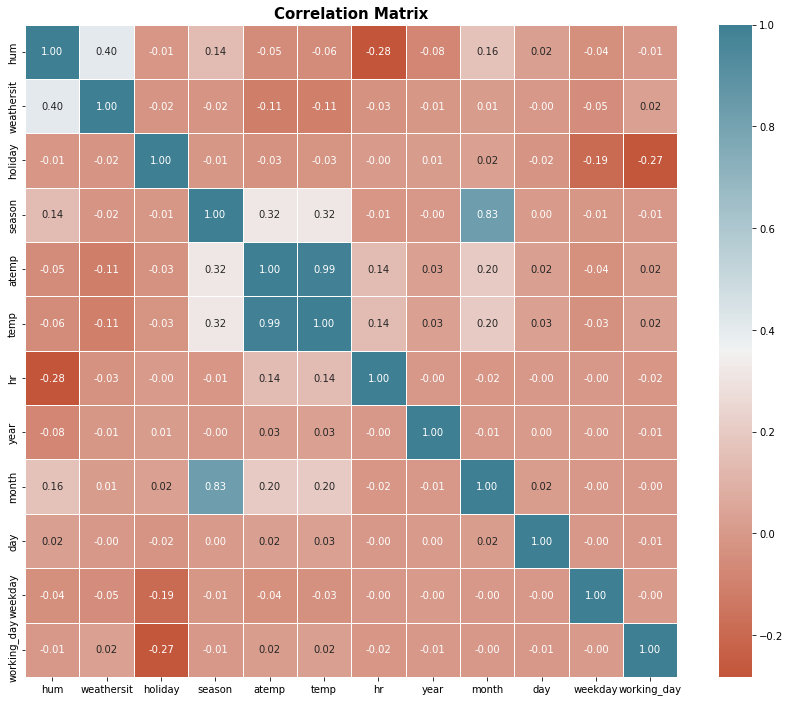

In [21]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.drop(columns=['cnt','dteday']).corr("spearman")
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

As we can see that there are some columns that had high correlation with other columns, But it is common to see that kind of correlation in a time series dataset.
however, I wanted to keep these features as they may still be useful for the model

In [16]:
df['cnt'].value_counts()

5      189
6      178
4      171
3      150
2      145
      ... 
629    1  
477    1  
602    1  
575    1  
636    1  
Name: cnt, Length: 641, dtype: int64

In [31]:
df['dteday'] = pd.to_datetime(df['dteday'])

## Modelling

In [51]:
from scipy.stats import randint, uniform
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor

In [52]:
# Kolom-kolom kategorikal yang akan di-encode
categorical_cols = ["season", "weathersit", "holiday"]

In [53]:
# Transform every categorical columns into numerical
transformer = ColumnTransformer([("onehot", OneHotEncoder(drop='first', handle_unknown='ignore'), ['season','year','month','day','weathersit','weekday','working_day']),
],remainder='passthrough')

In [57]:
# Seperate the independent variable from the target
X = df.drop(columns=['cnt','dteday'])
y = df['cnt']

In [63]:
from sklearn.model_selection import train_test_split
# Pisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
# Splitting dataset for model testing and training
df_train=df[(df['year']==2011)].copy()
x_train=df_train.drop(columns=['cnt','dteday'])
y_train=df_train['cnt']

df_test=df[(df['year']==2012)].copy()
x_test=df_train.drop(columns=['cnt','dteday'])
y_test=df_train['cnt']

KeyError: 'year'

In [27]:
# Checking if our transform fit correctly or not
transformer.fit_transform(X)

<12165x60 sparse matrix of type '<class 'numpy.float64'>'
	with 109824 stored elements in Compressed Sparse Row format>

we need to ensure that we do not introduce randomness. 
The time series needs to be continuous and in order. We cannot be randomly splitting our data into train and test sets. Rather, we should use TimeSeriesSplit to avoid that we predict the target with information that we would not have been able to know at the time of the forecast.

Furthermore, when using bagging or bootstrapping algorithms, such as random forests and XGBoost, ensure that you actually don’t bootstrap because this would again introduce randomness and look-ahead bias into our prediction (XGBoost by default does not bootstrap, while random forests does).

**Choose a Benchmark Model**

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

In [71]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

# Membangun pipeline dengan ColumnTransformer dan model regresi
lg = LinearRegression(n_jobs=-1)
rd = Ridge(max_iter=1000, random_state=10)
ls = Lasso(max_iter=1000, random_state=10)
rf = RandomForestRegressor(bootstrap=False, random_state=10, n_jobs=-1)
xgb = XGBRegressor(random_state=10, n_jobs=-1)
ada = AdaBoostRegressor(random_state=10, base_estimator=DecisionTreeRegressor())

models = [lg, rd, ls, rf, xgb, ada]

# Menggunakan make_scorer untuk membuat skor sesuai metrik evaluasi yang diinginkan
scoring_rmse = 'neg_root_mean_squared_error'
scoring_mae = 'neg_mean_absolute_error'
scoring_mape = 'neg_mean_absolute_percentage_error'

# Menyiapkan data untuk dataframe
data = []

for model in models:
    crossval = TimeSeriesSplit(n_splits=5)    
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    # Cross-validation dengan skor sesuai metrik evaluasi yang diinginkan
    rmse_scores = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring=scoring_rmse)
    mae_scores = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring=scoring_mae)
    mape_scores = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring=scoring_mape)
    
    # Menyimpan informasi model, standar deviasi, dan rata-rata
    model_name = model.__class__.__name__
    data.append([model_name, rmse_scores.std(), rmse_scores.mean(),
                 mae_scores.std(), mae_scores.mean(),
                 mape_scores.std(), mape_scores.mean()])

# Membuat dataframe
columns = ['Model', 'RMSE Std Dev', 'RMSE Mean', 'MAE Std Dev', 'MAE Mean', 'MAPE Std Dev', 'MAPE Mean']
results_df = pd.DataFrame(data, columns=columns)

# Menampilkan dataframe
print(results_df)

                   Model  RMSE Std Dev   RMSE Mean  MAE Std Dev   MAE Mean  \
0  LinearRegression       3.486310     -120.911849  2.598334    -92.458831   
1  Ridge                  3.501253     -120.967302  2.640235    -92.584075   
2  Lasso                  3.493978     -121.131217  2.782966    -92.324899   
3  RandomForestRegressor  5.516665     -69.412600   4.314250    -41.913542   
4  XGBRegressor           4.959528     -47.801274   3.919344    -31.801596   
5  AdaBoostRegressor      5.986742     -54.001195   4.618387    -33.462563   

   MAPE Std Dev  MAPE Mean  
0  0.106354     -3.111117   
1  0.114283     -3.114533   
2  0.156950     -3.066856   
3  0.045152     -0.474774   
4  0.092403     -0.573015   
5  0.085500     -0.451217   


In [69]:
# Define what algorithm that we'll use
lg = LinearRegression(n_jobs=-1)
rd = Ridge(max_iter=1000, random_state=10)
ls = Lasso(max_iter=1000, random_state=10)
rf = RandomForestRegressor(bootstrap=False,random_state=10,n_jobs=-1)
xgb = XGBRegressor(random_state=10,n_jobs=-1)
ada = AdaBoostRegressor(random_state=10, base_estimator=DecisionTreeRegressor())


# List of models
models = [lg, rd, ls, rf, xgb, ada]

score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

# Make a loop to find the best algorithm
for i in models:
    
    crossval = TimeSeriesSplit(n_splits=5)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    mean_rmse.append(model_cv_rmse.mean())
    std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    mean_mae.append(model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    mean_mape.append(model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())

[-117.93228325 -124.82418821 -116.35785625 -120.56698976 -124.8779291 ] LinearRegression(n_jobs=-1)
[-89.30811314 -95.37278897 -90.12981143 -91.92202504 -95.56141749] LinearRegression(n_jobs=-1)
[-3.12858083 -3.18892026 -3.25659021 -2.98541504 -2.99607752] LinearRegression(n_jobs=-1)
[-117.88683165 -124.72446686 -116.31660194 -120.93404681 -124.97456483] Ridge(max_iter=1000, random_state=10)
[-89.27691106 -95.40132829 -90.20113898 -92.26337677 -95.77761859] Ridge(max_iter=1000, random_state=10)
[-3.12576084 -3.20404484 -3.26967801 -2.97324773 -2.99993192] Ridge(max_iter=1000, random_state=10)
[-117.30109394 -123.74958333 -117.1639421  -121.4444124  -125.99705244] Lasso(random_state=10)
[-88.23116059 -93.85093449 -90.90206564 -92.12353644 -96.51679888] Lasso(random_state=10)
[-2.93674323 -3.1412988  -3.34201538 -2.93595264 -2.97827157] Lasso(random_state=10)
[-78.44044136 -71.37496    -69.9548284  -63.7530052  -63.53976541] RandomForestRegressor(bootstrap=False, n_jobs=-1, random_state=

In [72]:
results_df

,Model,RMSE Std Dev,RMSE Mean,MAE Std Dev,MAE Mean,MAPE Std Dev,MAPE Mean
0,LinearRegression,3.486310,-120.911849,2.598334,-92.458831,0.106354,-3.111117
1,Ridge,3.501253,-120.967302,2.640235,-92.584075,0.114283,-3.114533
2,Lasso,3.493978,-121.131217,2.782966,-92.324899,0.156950,-3.066856
3,RandomForestRegressor,5.516665,-69.412600,4.314250,-41.913542,0.045152,-0.474774
4,XGBRegressor,4.959528,-47.801274,3.919344,-31.801596,0.092403,-0.573015
5,AdaBoostRegressor,5.986742,-54.001195,4.618387,-33.462563,0.085500,-0.451217


In [70]:
# Evaluating the results from the models that we chose
pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso','Random Forest','XGboost', 'Adaboost'],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-120.911849,3.486310,-92.458831,2.598334,-3.111117,0.106354
1,Ridge,-120.967302,3.501253,-92.584075,2.640235,-3.114533,0.114283
2,Lasso,-121.131217,3.493978,-92.324899,2.782966,-3.066856,0.156950
3,Random Forest,-69.412600,5.516665,-41.913542,4.314250,-0.474774,0.045152
4,XGboost,-47.801274,4.959528,-31.801596,3.919344,-0.573015,0.092403
5,Adaboost,-54.001195,5.986742,-33.462563,4.618387,-0.451217,0.085500


There are pretty significant difference between RMSE and MAE, where the value of RMSE is higher cause by it gives more importance to the highest errors, hence it is more sensitive to outliers whereas on the other hand MAE is more robust to outliers.

Based on all of metric evaluations, XGboost is being the best model with the least value on `RMSE`, `MAE` and `MAPE` also.


We'll do run the xgboost model with default hyperparameter and predict to data test.

In [76]:
score_rmse = []
score_mae = []
score_mape = []

# Then predict to Datatest
xgb_model = Pipeline([
    ('preprocessing', transformer),
    ('model', xgb)
    ])

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape})
score_before_tuning

,RMSE,MAE,MAPE
0,41.519361,27.156864,0.522511


## Hyperparameter Tuning

In [33]:
# Display all the params from our estimator
estimator.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore'),
                                    ['season', 'year', 'month', 'day',
                                     'weathersit', 'weekday', 'working_day'])])),
  ('model',
   AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=10))],
 'verbose': False,
 'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehot',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'),
                                  ['season', 'year', 'month', 'day',
                                   'weathersit', 'weekday', 'working_day'])]),
 'model': AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), 

In [34]:
# Model that being hyperparamter tuned
xgb = XGBRegressor(random_state=10)

# Algorithm chains
estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = TimeSeriesSplit(n_splits=5)

hyperparam_space={'model__eta':[0.1, 0.3, 0.5, 0.7, 0.9],
                  'model__max_depth':[10, 100, 1000, 10000]
}

# Find the best parameters to get the best scores using randomized search
randomized = RandomizedSearchCV(
    estimator, 
    param_distributions = hyperparam_space,
    n_iter = 20,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 1  
)

randomized.fit(x_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['season',
                                                                                'year',
                                                                                'month',
                                                                                'day',
                                                                                'weathersit',
                                                                                'weekday',
                                                                                'working_day'])])),
                                             ('model',
                                              XGBRegressor(bas...
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=10,
                                                           reg_alpha=None,
                                                           reg_lambda=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__eta': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'model__max_depth': [10, 100, 1000,
                                                             10000]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [35]:
pd.DataFrame(randomized.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__eta,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
4,0.592198,0.196428,0.017500,0.000316,10,0.3,"{'model__max_depth': 10, 'model__eta': 0.3}",-81.888605,-74.512915,-54.222519,...,6.562197,1,-0.579903,-0.710466,-0.454305,-0.370388,-0.656715,-0.554355,0.125980,2
0,0.589399,0.229646,0.022700,0.008858,10,0.1,"{'model__max_depth': 10, 'model__eta': 0.1}",-85.450049,-76.110630,-54.367923,...,7.136337,2,-0.573527,-0.768250,-0.397147,-0.369573,-0.645070,-0.550713,0.150426,1
5,1.309599,0.682581,0.023000,0.004484,100,0.3,"{'model__max_depth': 100, 'model__eta': 0.3}",-82.626208,-75.896515,-59.035980,...,6.602761,3,-0.592894,-0.787735,-0.417915,-0.391393,-0.758278,-0.589643,0.165216,12
6,1.317599,0.733770,0.021401,0.005296,1000,0.3,"{'model__max_depth': 1000, 'model__eta': 0.3}",-82.626208,-75.896515,-59.035980,...,6.602761,3,-0.592894,-0.787735,-0.417915,-0.391393,-0.758278,-0.589643,0.165216,12
7,1.290400,0.712574,0.021800,0.005381,10000,0.3,"{'model__max_depth': 10000, 'model__eta': 0.3}",-82.626208,-75.896515,-59.035980,...,6.602761,3,-0.592894,-0.787735,-0.417915,-0.391393,-0.758278,-0.589643,0.165216,12


In [36]:
# Print the best parameters that output the best score
print('XGBoost')
print('Best_score:', randomized.best_score_)
print('Best_params:', randomized.best_params_)

XGBoost
Best_score: -68.89831409978196
Best_params: {'model__max_depth': 10, 'model__eta': 0.3}


In [37]:
# Model XGB
model = {'xgb': XGBRegressor(random_state=10)}

# Define model terhadap estimator terbaik
xgb_tuning = randomized.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Print the values of metrics from RMSE, MAE & MAPE after being tuned
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
xgb
score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
xgb,3.007514,2.0082,0.053478


In [38]:
score_before_tuning

,RMSE,MAE,MAPE
xgb,17.426278,11.910838,0.29008


In [39]:
score_after_tuning

,RMSE,MAE,MAPE
xgb,3.007514,2.0082,0.053478


As we can see that the models get a pretty bumped up of performance that being representated by the reduced values of all metric evaluations.
* RMSE, MAE & MAPE before being tuned: 17.42, 11.91, 0.290
* RMSE, MAE & MAPE after being tuned: 3.007, 2.008, 0.053

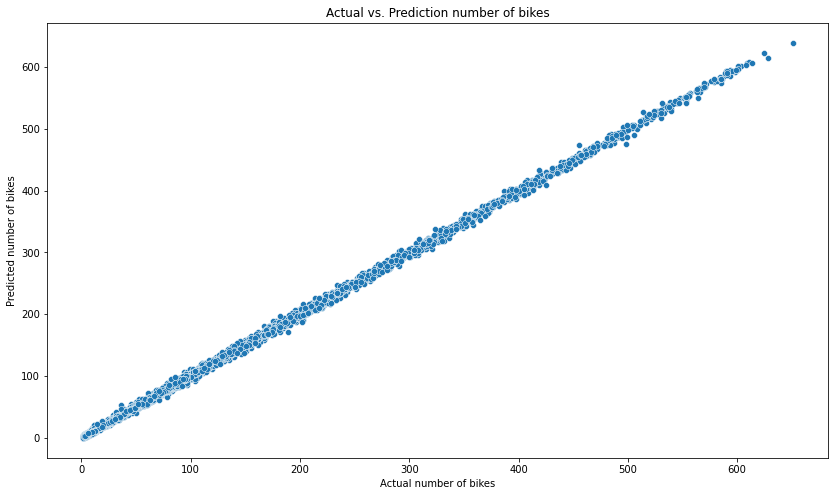

In [40]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction number of bikes', 
                                               xlabel='Actual number of bikes', 
                                               ylabel='Predicted number of bikes')

<AxesSubplot: title={'center': 'Feature Importances'}>

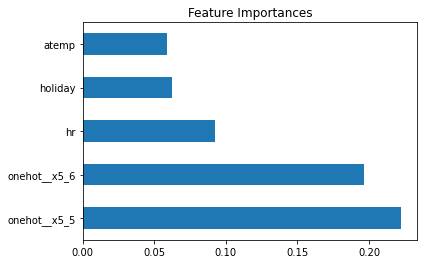

In [41]:
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances')

# Conclusion
XGBoost is the best performing model out of the six models and is more robust against overfitting and noise. However, it seems like because of the lack amount of data cause a terribly score on data train than on test score (MAPE 0.75 for train score and MAPE 0.05 for test score). 

It usually indicates that there are some differences between the kind of data that trained the model on and the testing data that provided for evaluation. When the data being splitted, Data train contain data from 2011 only and being 'splitted' again by cross validation process so it scores terribly on train score while on data test, it used all the data from 2011 to predict data from 2012       

Spending more time on feature selection and engineering and also adding more data can leads to better result.


# Recommendation
* Adding the amount of data, especially for an annual cycle so that the data train could become larger and the prediction become more accurate eventually
* Adding more features contain of data that can also be represent or contribute to the amount of bikes that being rented from days to days.
* Making some kind of systems that can make customer to be able to rent the bike from days before, so that the amount of bikes that being placed on each stations can be adjusted by the reservation system also.

# Save Model

In [42]:
import pickle

In [43]:
# Import Dataset
# import seaborn as sns
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import warnings
# warnings.filterwarnings('ignore')
# from statsmodels.tsa.seasonal import seasonal_decompose
# from scipy.stats import randint, uniform
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import cross_val_score, RandomizedSearchCV, TimeSeriesSplit
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# from xgboost.sklearn import XGBRegressor

# # Preprocessing
# df['dteday'] = df['dteday'].astype('datetime64')

# df = df.sort_values(['dteday', 'hr']).reset_index()
# df.drop(columns='index', inplace=True)

# year = []
# month = []
# day = []
# for i in df["dteday"]:
#     year.append(i.year)
#     month.append(i.month)
#     day.append(i.day)
# df["year"] = year
# df["month"] = month
# df["day"] = day

# df['weekday'] = df['dteday'].apply(lambda x: x.weekday())

# df['working_day'] = df['weekday'].apply(lambda x: 0 if x > 5 or x == 0 else 1)
# df['working_day'] = df[['holiday', 'working_day']].apply(
#     lambda x: 0 if x['holiday'] == 1 else x['working_day'], axis=1)

# df.drop(columns=['registered', 'casual'], inplace=True)

# Modeling
# transformer = ColumnTransformer([("onehot", OneHotEncoder(drop='first', handle_unknown='ignore'), ['season','year','month','day','weathersit','weekday','working_day']),
# ],remainder='passthrough')

# x = df.drop(columns=['cnt','dteday'])
# y = df['cnt']

# xgb = XGBRegressor(n_jobs=-1, eta= 0.3, max_depth= 10)

# estimator = Pipeline([
#         ('preprocessing', transformer),
#         ('model', xgb)
#         ])


# estimator.fit(x, y)

# pickle.dump(estimator, open("model_bike_sharing.sav", "wb"))




In [44]:
# Load Model
# loaded_model = pickle.load(open("model_bike_sharing.sav", "rb"))
# mean_absolute_percentage_error(y, loaded_model.predict(x))

